# Introduction

In this little project, I will explore the use of information gain, entropy, Gini Index, as well as compare single decision tree classifier with random forest ensemble. The dataset was taken from the machine learning dataset repository at the University of California at Irvine. The goal is to classify grill mushrooms into 2 categories: (p) poisonous and (e) edible. This is a classic supervised segmentation problem that can be approached appropriately using Tree-Structured Models. 

Mathematical and statistical background is referenced from the book Data Science for Business by Foster Provost & Tom Fawcett.

# Background

The background is the bare bone skeleton for the project that help me understand the application of statistics and mathematics in machine learning algorithm. The definitions and assumptions were simplified to highlight the concepts, tools and techniques employed to solve simple yet interesting prolem using data. This project by no mean a guild or showcase of knowledge, but rather a playground for the data science techniques in the practical world. 

### Some of the important concepts include:

#### 1) Entropy:

Entropy is the measure of disorder. It describes how mixed (impure) the individual segments with respect to the desire propotion. Entropy with value 0 indicates perfect separation of the set, while 1 suggests maximum mix. 

Entropy is defined as:

$$entropy = -p1log(p1) - p2log(p2) - ...$$

Each p value is the probability of a given attribute within the set, where p=1 when all members of the set have that property, and p=0 when no members of the set have that property. This mean when p=1 or p=0, the entropy =0. Entropy is maximized when p=0.5 (50/50 mix of 2 properties).

#### 2) Information gain: 
This is the most common criterion when splitting attributes. Information gain is a function of parent and children set(subset) resulting from the partitioning of the parent set. It describes quantitatively how much information or how much more certain about the value of the target variable that the split provided. 
The information gain is defined by:

$$IG = entropy(parent) - [p(child1)*entropy(child1) + p(child2)*entropy(child2) + ...]$$

It's important to note that the entropy of the children set is multiplied by their proprotion in that particular set. The total of the children proportion is always = 1 (100%)

#### 3) Gini Index:
Gini index is very similar to entropy in the sense that it's also a measure of disorder (or inequality) in a subset. Gini index has values between 0 to 1 (while 0 is perfect equality and 1 is absolute inequality). In the context of decision tree classifier, the Gini index is a measure of the node purity (value of 0 is pure and value of 1 is not pure). When a node has Gini index = 0, a pure set is defined and no further split is needed. This node is called a leaf node.

The Gini index is defined by:

$$ G=(\sum^n_{i=1} \sum^n_{j=1}|x_i-x_j|) / (2n^2mu) $$

Explaination: Gini Index equal to the mean of the difference between every possible pair of individuals, divided by the mean size

### Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [36]:
df = pd.read_csv('mushrooms.csv')

### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Column 'Class' contains the target variable (p) poisonous and (e) edible. It's apparent that all the variables are normial and need to be converted to ordinal (encoded variable) for machine learning use. 

### Data prep: Encode all the categorical variables to ordinal numerical variables:

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in df.columns:
    df[column]= labelencoder.fit_transform(df[column])

In [57]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Target variables was now encoded 1 for poisonous and 0 for edible. This information will be use later on for our decision tree visualization.

### Is the target variable balanced?

In [39]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [40]:
3916/4208

0.9306083650190115

Looks like the target attribute is slightly unbalance (more edible than poisonous mushrooms, 1 to .93 ratio). Let's visualize this:

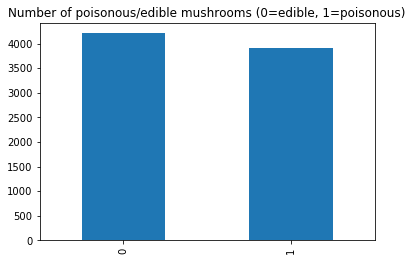

In [41]:
pd.Series(df['class'].value_counts()).plot(kind="bar")
plt.title("Number of poisonous/edible mushrooms (0=edible, 1=poisonous)")

### How does all the variables correlated?

In [42]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


I noticed the veil-type returned NaN for all columns. This suggests that veil-type is irrelevant in this set.


#### Let's visualize this table in form of heatmap:

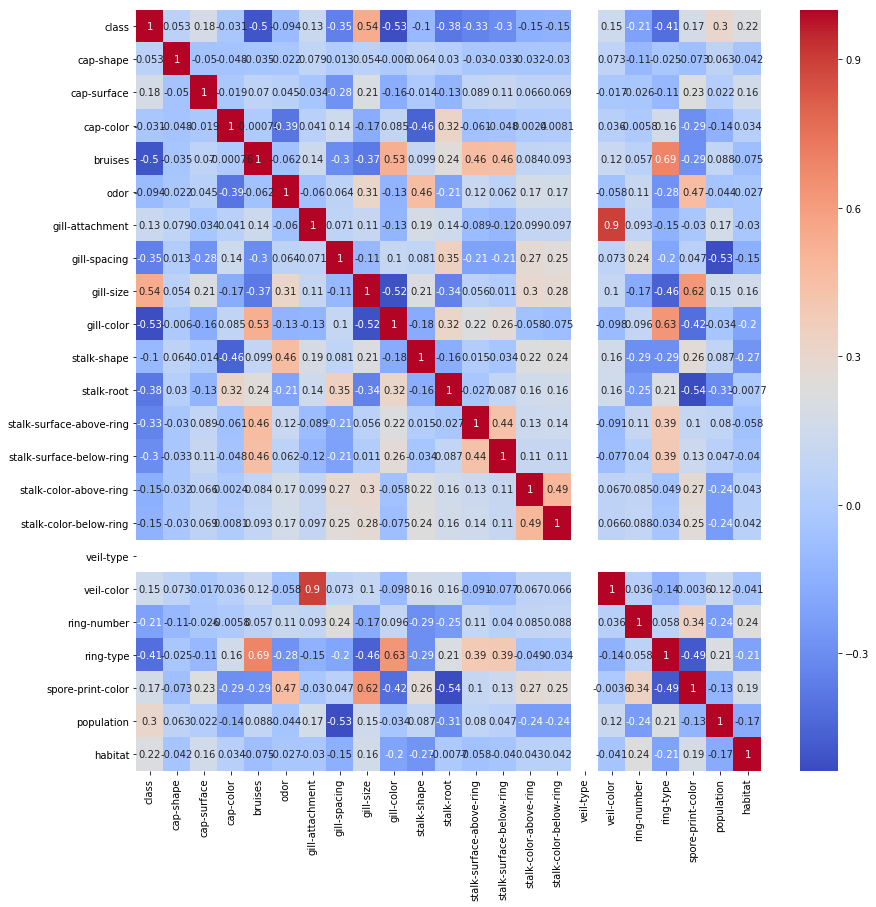

In [43]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

## Decision Tree classifier

#### Spliting train_test data:

In [44]:
from sklearn.model_selection import train_test_split

In [58]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

y= df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
from sklearn.tree import DecisionTreeClassifier

#### Fit and train the data on the training set:

In [60]:
dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predict on the test set:

In [62]:
predictions = dtree.predict(X_test)

### Evaluate the model

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
print("Confusion Matrix Report:", "\n", confusion_matrix(y_test, predictions))
print("\n")
print("Classification Report:", "\n", classification_report(y_test, predictions))

Confusion Matrix Report: 
 [[1274    0]
 [   0 1164]]


Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438



Our model predicted 100% correct. This seems too good to be true!
The overwheeling correct predictions may suggest over-fitting. I may come back and use cross-validation method such as K-fold to help alleviate this prolem. 

### Visualize the model:

Decision tree was my choice of classification method due to it's simplicity and interpretability. Let's visualize the tree to see how our model decide to select important attributes. 

In [65]:
from sklearn import tree
import graphviz

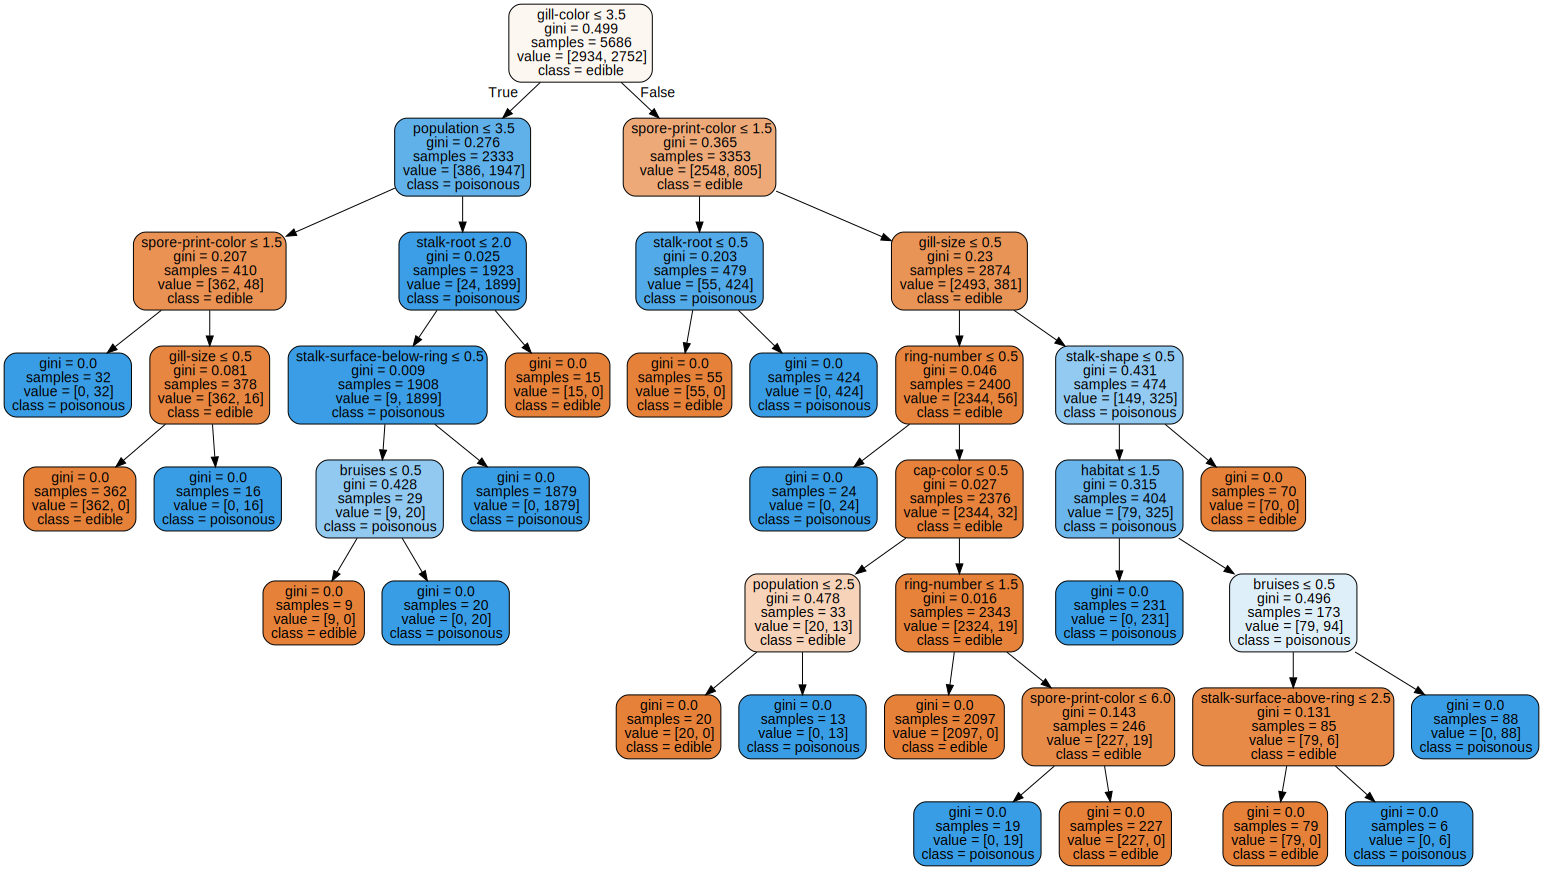

In [66]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=df.columns[1:],  
                         class_names=['edible','poisonous'],  #(0=edible, 1=poisonous)
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)  
graph 

We can see from the visualization that the first split- attribute split that result in the most information gain, is gill-color. Let's see what are the next important attribute that our model selected.

### Visualize feature importances

In [54]:
# Identify important features:
important_feats = pd.DataFrame(dtree.feature_importances_).transpose()
important_feats.columns = df.columns[1:]
important_feats

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.003757,0.004556,0.027663,0.0,0.0,0.0,0.122853,0.343022,0.022083,...,0.001855,0.0,0.019649,0.0,0.0,0.0024,0.0,0.210956,0.180337,0.014338


In [55]:
important_feats = important_feats.sort_values(by= 0, ascending=False, axis=1) # sorting importances in descending order

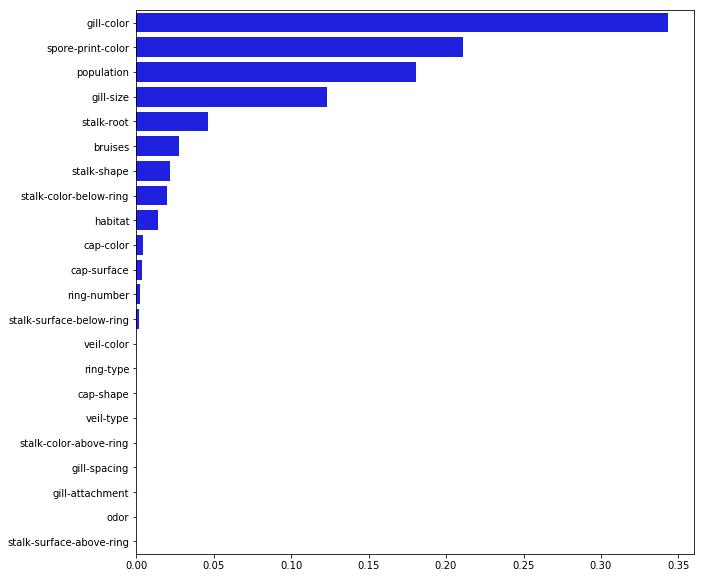

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(data=important_feats, orient='h', color='blue')

According to our model, the top 4 important features are: gill-color, spore-print-color, population, and gill-size

### Let's explore further these 4 variables:

### Possible improvement to the model

As disscuss in the introduction, we'll use random forest - a common ensemble learning method, to improve the model. However, since the model correctly predicted 100% of the case, there's no need for such ensemble. We'll run random forest just to verify that our decision tree's splits on strong features are not bias.

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier()

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfc_predictions = rfc.predict(X_test)

#### Model result:

In [31]:
print("Confusion Matrix Report:", "\n", confusion_matrix(y_test, rfc_predictions))
print("\n")
print("Classification Report:", "\n", classification_report(y_test, rfc_predictions))

Confusion Matrix Report: 
 [[1257    0]
 [   0 1181]]


Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1257
          1       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438

